In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV

data = pd.read_csv('/content/gapminder.csv', low_memory=False)
 
data['internetuserate'] = pd.to_numeric(data['internetuserate'], errors='coerce')
data['incomeperperson'] = pd.to_numeric(data['incomeperperson'], errors='coerce')
data['employrate'] = pd.to_numeric(data['employrate'], errors='coerce')
data['femaleemployrate'] = pd.to_numeric(data['femaleemployrate'], errors='coerce')
data['polityscore'] = pd.to_numeric(data['polityscore'], errors='coerce')
data['alcconsumption'] = pd.to_numeric(data['alcconsumption'], errors='coerce')
data['lifeexpectancy'] = pd.to_numeric(data['lifeexpectancy'], errors='coerce')
data['oilperperson'] = pd.to_numeric(data['oilperperson'], errors='coerce')
data['relectricperperson'] = pd.to_numeric(data['relectricperperson'], errors='coerce')
data['urbanrate'] = pd.to_numeric(data['urbanrate'], errors='coerce')

sub1 = data.copy()
data_clean = sub1.dropna()

In [30]:
predvar = data_clean[['incomeperperson','employrate','femaleemployrate','polityscore',
                      'alcconsumption', 'lifeexpectancy', 'oilperperson',
                      'relectricperperson', 'urbanrate']]
target = data_clean.internetuserate

In [31]:
predictors=predvar.copy()
from sklearn import preprocessing
predictors['incomeperperson']=preprocessing.scale(predictors['incomeperperson'].astype('float64'))
predictors['employrate']=preprocessing.scale(predictors['employrate'].astype('float64'))
predictors['femaleemployrate']=preprocessing.scale(predictors['femaleemployrate'].astype('float64'))
predictors['polityscore']=preprocessing.scale(predictors['polityscore'].astype('float64'))
predictors['alcconsumption']=preprocessing.scale(predictors['alcconsumption'].astype('float64'))
predictors['lifeexpectancy']=preprocessing.scale(predictors['lifeexpectancy'].astype('float64'))
predictors['oilperperson']=preprocessing.scale(predictors['oilperperson'].astype('float64'))
predictors['relectricperperson']=preprocessing.scale(predictors['relectricperperson'].astype('float64'))
predictors['urbanrate']=preprocessing.scale(predictors['urbanrate'].astype('float64'))

In [32]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size=.3, random_state=123)

In [33]:
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

In [34]:
dict(zip(predictors.columns, model.coef_))

{'alcconsumption': 6.221071813537989,
 'employrate': 0.0,
 'femaleemployrate': 0.0,
 'incomeperperson': 10.730391069082595,
 'lifeexpectancy': 7.941516118335266,
 'oilperperson': 0.0,
 'polityscore': 0.33239766721690117,
 'relectricperperson': 3.363356602681382,
 'urbanrate': 1.1025066405302557}

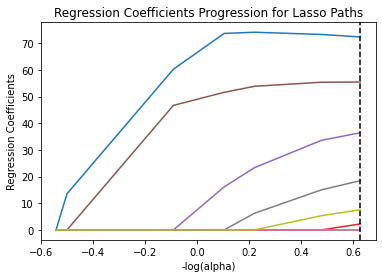

In [35]:
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')
plt.show()

In [36]:
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


AttributeError: ignored

<Figure size 432x288 with 0 Axes>

In [37]:
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('')
print ('test data MSE')
print(test_error)

training data MSE
100.10393601519011

test data MSE
120.56897024142876


In [38]:
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('')
print ('test data R-square')
print(rsquared_test)

training data R-square
0.8613441423617307

test data R-square
0.7769425808132838
